In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('sales_data_with_discounts.csv')


In [2]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [3]:

# Step 2: Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(numerical_cols)

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [4]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


# Histogram


2.731723626557714


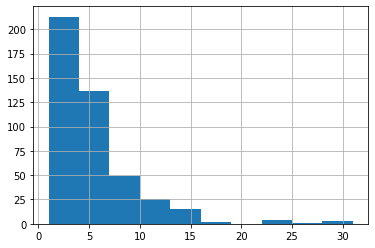

In [5]:
df["Volume"].hist()
print(df["Volume"].skew())

AxesSubplot(0.125,0.125;0.775x0.755)
1.9088730767759727


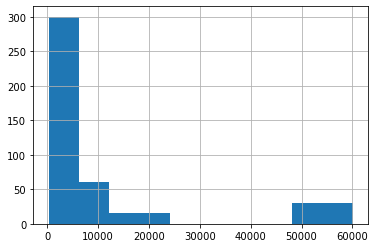

In [6]:
print(df["Avg Price"].hist())
print(df["Avg Price"].skew())

AxesSubplot(0.125,0.125;0.775x0.755)
1.5347293238977937


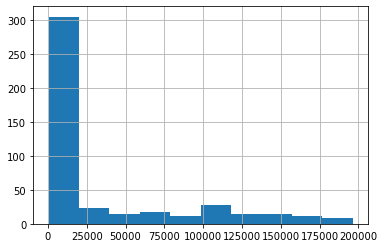

In [7]:
print(df["Total Sales Value"].hist())
print(df["Total Sales Value"].skew())


AxesSubplot(0.125,0.125;0.775x0.755)
-1.0622943696988825


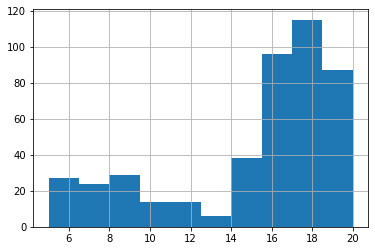

In [8]:
print(df["Discount Rate (%)"].hist())
print(df["Discount Rate (%)"].skew())


AxesSubplot(0.125,0.125;0.775x0.755)
1.9130377339538271


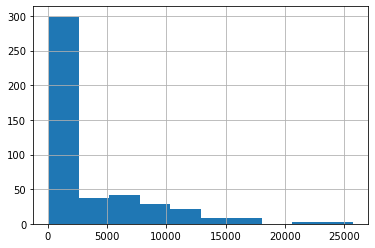

In [9]:
print(df["Discount Amount"].hist())
print(df["Discount Amount"].skew())


AxesSubplot(0.125,0.125;0.775x0.755)
1.5408217575344376


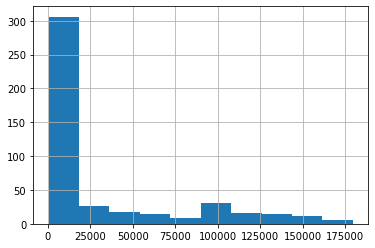

In [10]:
print(df["Net Sales Value"].hist())
print(df["Net Sales Value"].skew())

# **BOX PLOT**

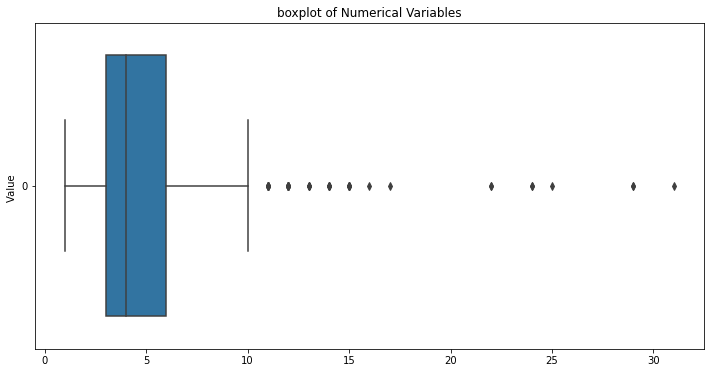

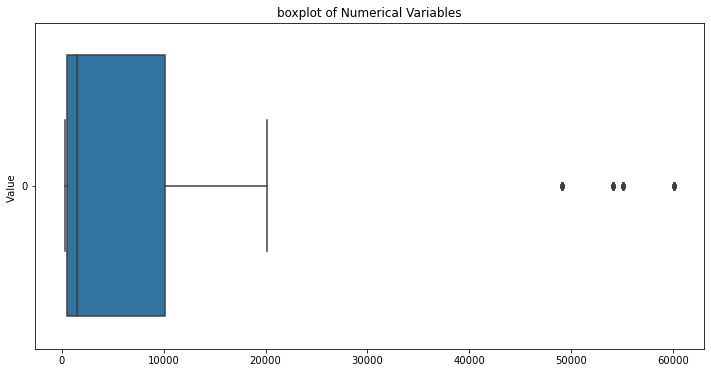

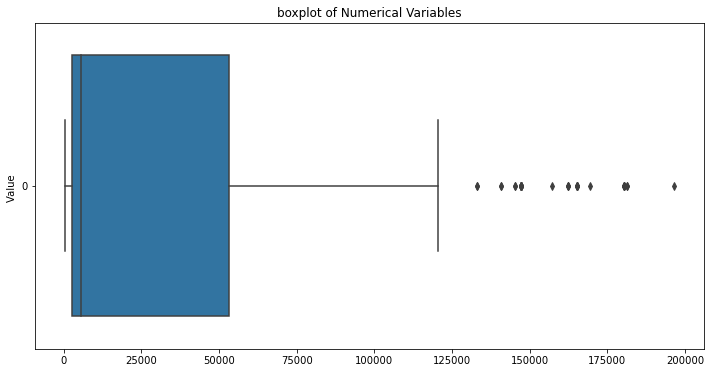

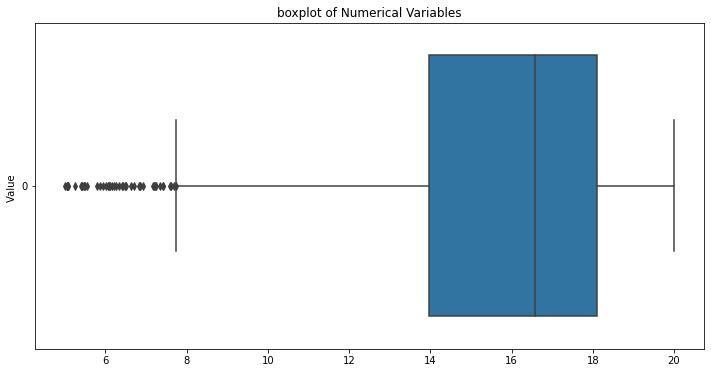

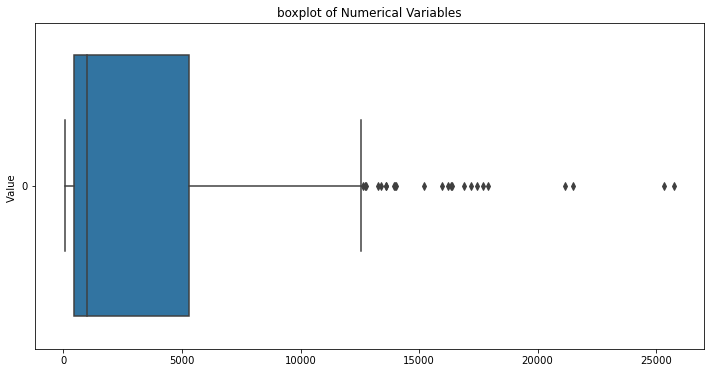

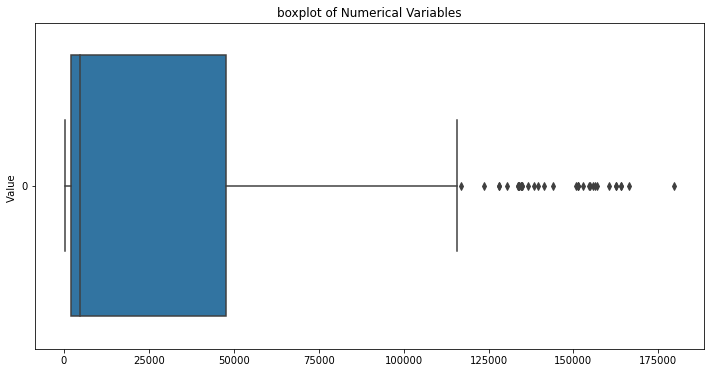

In [11]:
j1 = ["Volume","Avg Price","Total Sales Value","Discount Rate (%)","Discount Amount","Net Sales Value"]
for i in j1:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[i], orient= 'h')
    plt.title( "boxplot of Numerical Variables")
    plt.ylabel("Value ")
    plt.show()

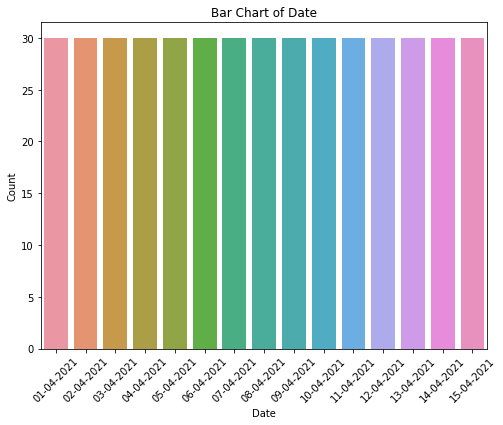

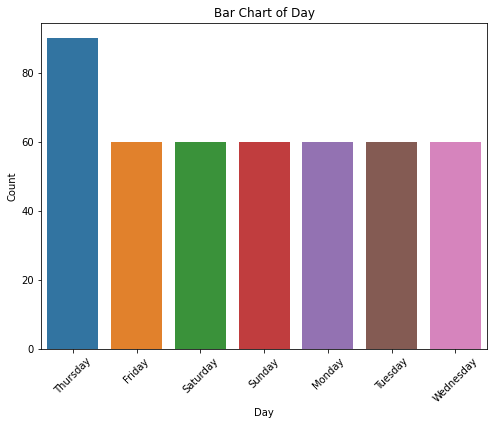

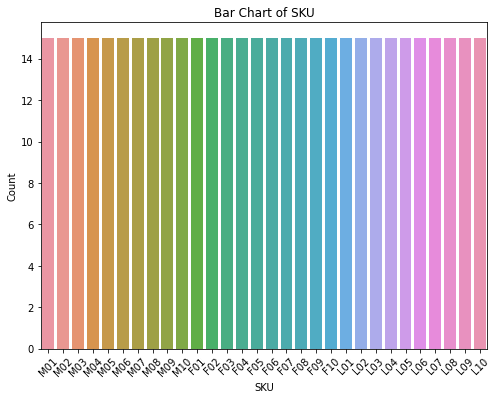

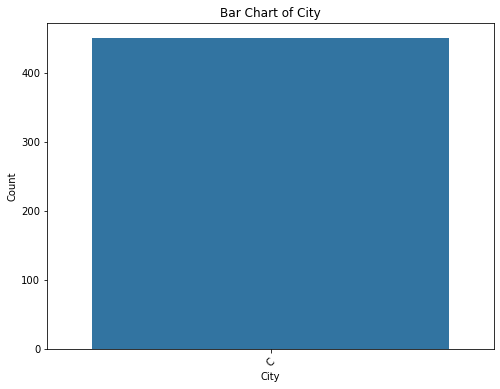

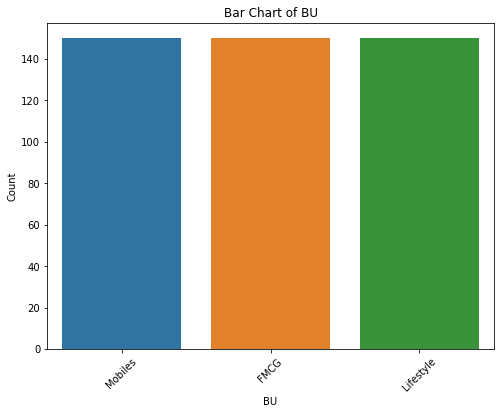

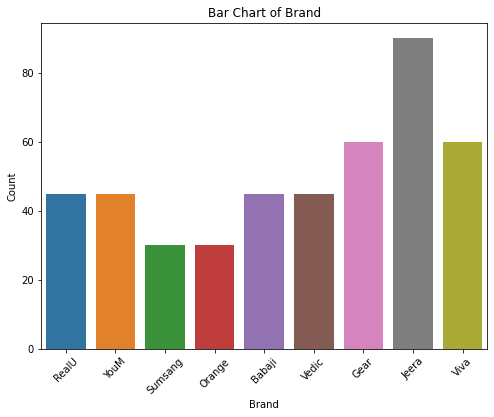

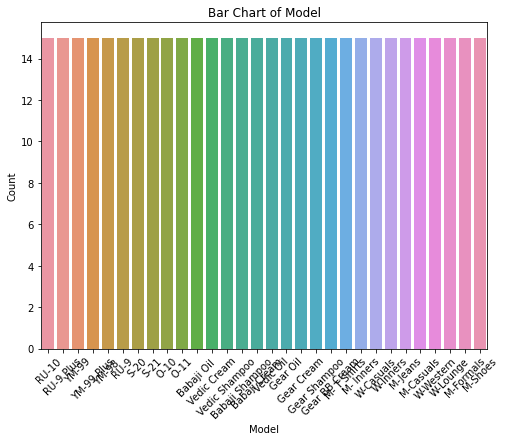

In [12]:
# Bar Chart Analysis for Categorical Column
categorical_cols = df.select_dtypes(include=[object]).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [15]:
# Comparison before and after standardization
print("\nBefore Standardization:")
print(df[numerical_cols].head())


Before Standardization:
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  


In [16]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X  = SS.fit_transform(df.iloc[:,10:])
print("\nAfter Standardization:")
SS_X


After Standardization:


array([[-0.83028851,  3.95281631,  2.80475594, ..., -0.83028851,
         3.95281631,  2.80475594],
       [-0.85266145,  1.84901409,  1.2710262 , ..., -0.85266145,
         1.84901409,  1.2710262 ],
       [-1.35163138,  1.62299458,  1.54567497, ..., -1.35163138,
         1.62299458,  1.54567497],
       ...,
       [ 0.90379261, -0.60813967, -0.60192115, ...,  0.90379261,
        -0.60813967, -0.60192115],
       [ 0.38847428, -0.53037877, -0.55549857, ...,  0.38847428,
        -0.53037877, -0.55549857],
       [ 0.04223476, -0.63734468, -0.60123949, ...,  0.04223476,
        -0.63734468, -0.60123949]])

In [21]:
# Conversion of Categorical Data into Dummy Variables
dummy_df = pd.get_dummies(df, columns=categorical_cols)

# Display a portion of the transformed dataset
print(dummy_df)

     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0        15      12100             181500          11.654820     21153.498820   
1        10      10100             101000          11.560498     11676.102961   
2         7      16100             112700           9.456886     10657.910157   
3         6      20100             120600           6.935385      8364.074702   
4         3       8100              24300          17.995663      4372.946230   
..      ...        ...                ...                ...              ...   
445       2       1300               2600          15.475687       402.367873   
446       6       2600              15600          17.057027      2660.896242   
447       2       1600               3200          18.965550       606.897606   
448       3       1900               5700          16.793014       957.201826   
449       1       3100               3100          15.333300       475.332295   

     Net Sales Value  Volum